In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
file = pd.read_csv('FirstConcat.csv')
#Working with a copy just in case
copy = pd.DataFrame(file)
#I want to be able to access day for grouping. also hour...
day = []
hour = []
ampm = []
hour_int = []

for i in range(len(copy['Time Stamp'])):
    day.append(int(copy['Time Stamp'][i].split(' ')[0].split('/')[1]))
    time = copy['Time Stamp'][i].split(' ')[1].split(':')
    hours = int(time[0])
    hour_int.append(hours)
    mins = int(time[1])
    secs = int(time[2])
    num = hours + mins/60 + secs/3600
    hour.append(num)
    if int(hours) < 12:
        ampm.append('AM')
    else:
        ampm.append('PM')
        
copy['day'] = day
copy['hour'] = hour
copy['ampm'] = ampm
copy['hour_int'] = hour_int

#Great. some working plots. I want to add day of week too, that should be relevant
#August 1, 2019 was a thursday, so lets use some mods to add those labels
# dayslist = ['Sunday','Monday','Tuesday', 'Wednesday','Thursday','Friday','Saturday']
dayslist = [0,1,2,3,4,5,6]
augdays = []

for i in range(len(copy['day'])):
    augdays.append(dayslist[(copy['day'][i]+3) % 7])
    
copy['DoW'] = augdays

Text(0.5, 0, 'Days')

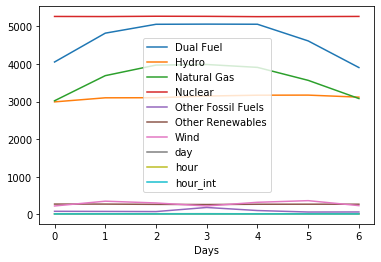

In [3]:
copy.groupby('DoW').mean().plot();
plt.xlabel('Days')

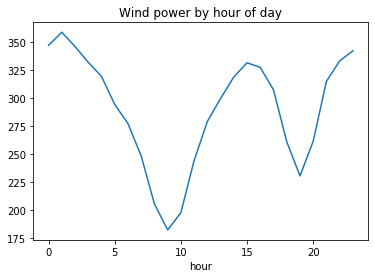

In [4]:
plt.plot(copy.groupby('hour_int').mean()['Wind']);
plt.title('Wind power by hour of day')
plt.xlabel('hour')
plt.show()

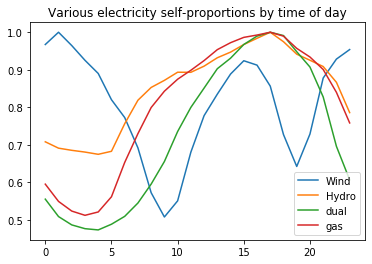

In [5]:
plt.plot(copy.groupby('hour_int').mean()['Wind']/copy.groupby('hour_int').mean()['Wind'].max(), label = 'Wind');
plt.plot(copy.groupby('hour_int').mean()['Hydro']/copy.groupby('hour_int').mean()['Hydro'].max(), label = 'Hydro')
plt.plot(copy.groupby('hour_int').mean()['Dual Fuel']/copy.groupby('hour_int').mean()['Dual Fuel'].max(), label = 'dual')
plt.plot(copy.groupby('hour_int').mean()['Natural Gas']/copy.groupby('hour_int').mean()['Natural Gas'].max(), label = 'gas')
plt.title("Various electricity self-proportions by time of day")
plt.legend()
plt.show()

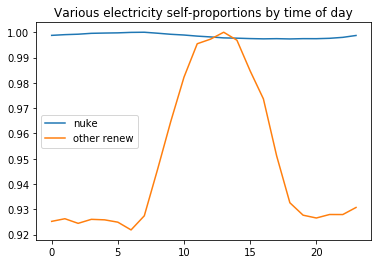

In [10]:
plt.plot(copy.groupby('hour_int').mean()['Nuclear']/copy.groupby('hour_int').mean()['Nuclear'].max(), label = 'nuke');
# plt.plot(copy.groupby('hour_int').mean()['Hydro']/copy.groupby('hour_int').mean()['Hydro'].max(), label = 'Hydro')
plt.plot(copy.groupby('hour_int').mean()['Other Renewables']/copy.groupby('hour_int').mean()['Other Renewables'].max(), label = 'other renew')
plt.title("Various electricity self-proportions by time of day")
plt.legend()
plt.show()

explanations: night breeze/day breeze?

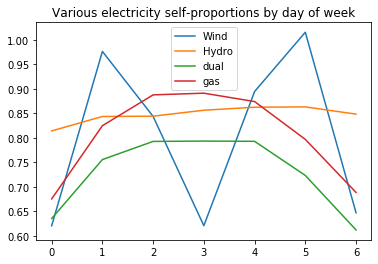

In [6]:
plt.plot(copy.groupby('DoW').mean()['Wind']/copy.groupby('hour_int').mean()['Wind'].max(), label = 'Wind');
plt.plot(copy.groupby('DoW').mean()['Hydro']/copy.groupby('hour_int').mean()['Hydro'].max(), label = 'Hydro')
plt.plot(copy.groupby('DoW').mean()['Dual Fuel']/copy.groupby('hour_int').mean()['Dual Fuel'].max(), label = 'dual')
plt.plot(copy.groupby('DoW').mean()['Natural Gas']/copy.groupby('hour_int').mean()['Natural Gas'].max(), label = 'gas')
plt.title("Various electricity self-proportions by day of week")
plt.legend()
plt.show()

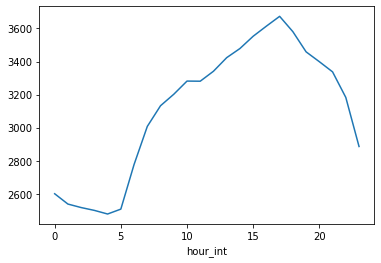

In [7]:
copy.groupby('hour_int').mean()['Hydro'].plot();

not sure about explanations here - max around 5 PM - end of heating period of day... more hydro when its hot?

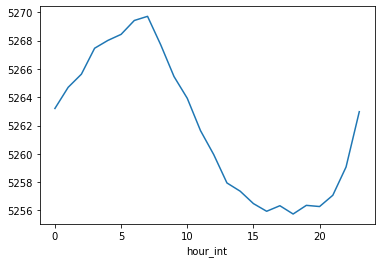

In [8]:
copy.groupby('hour_int').mean()['Nuclear'].plot();

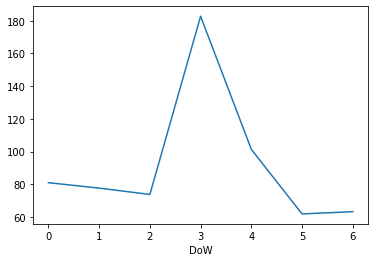

In [9]:
copy.groupby('DoW').mean()['Other Fossil Fuels'].plot()